# Seabron - 고급 그래프
- Matplotlib의 기능과 스타일을 확장한 파이썬 시각 도구의 고급버젼
- 어느 상황에 어느 그래프를 써야하는지를 잘 알아야함
- ML할떄 많이 사용 (DL은 2차원이 넘어서 그리기 힘들어)
- 최근의 그래프는 거의다 이걸로 나옴!

In [4]:
# Seaborn package에서 제공하는 titanic 데이터셋 가져오기
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')


In [6]:
import matplotlib.pyplot as plt

In [24]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [8]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 회귀선이 있는 산점도

In [9]:
# 스타일들
sns.set_style('darkgrid') # darkgrid, whitegrid, dark, white, ticks

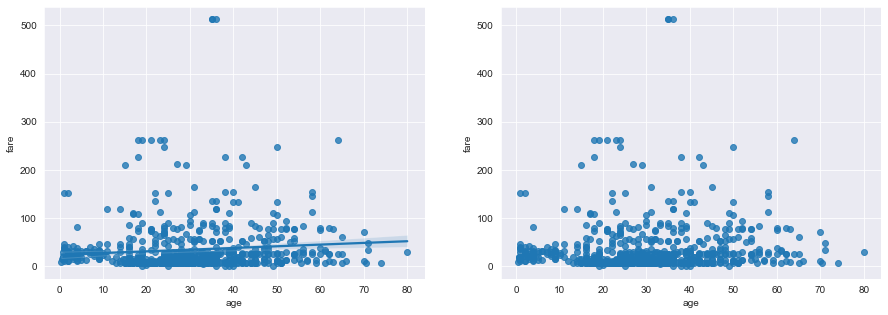

In [10]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

#선형 회귀선(reg)이 포함된 그래프 그리기
sns.regplot(
    x = 'age',# x축은 age
    y = 'fare', #y 축은 fare이고
    data = titanic, # 데이터는 타이타닉이고
    ax = ax1 #그림은 ax1에 그릴꺼야
)

#선형 회귀선(reg)이 미포함된 그래프 그리기
sns.regplot(
    x = 'age',# x축은 age
    y = 'fare', #y 축은 fare이고
    data = titanic, # 데이터는 타이타닉이고
    ax = ax2, #그림은 ax1에 그릴꺼야
    fit_reg=False # 선형회귀선 안그릴꺼야
)

plt.show()

---
## 히스토그램(빈도수) / 커널밀도그래프 (히스토 + 커널)

- 커널밀도 함수는 그래프와 X축 사이의 면적이 1이 되도록그리는 밀도 분포 함수  
- (어느쪽에 데이터가 많이 몰려있냐를 볼때 그리는 그래프)

In [11]:
# 히스토그랰 커널 밀도그래스
# 커널 밀도그래프
# 히스토그램

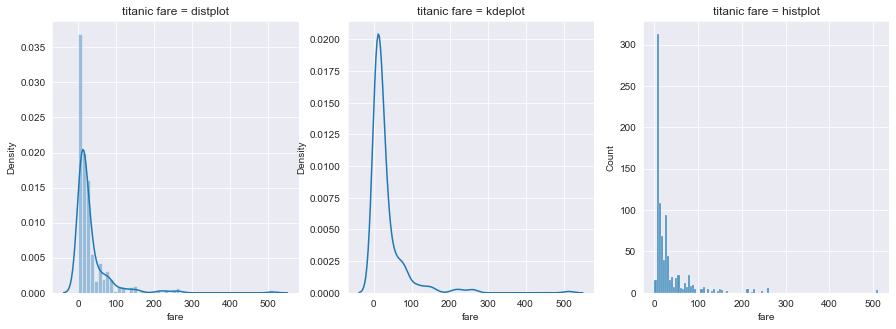

In [12]:
fig  = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1) # 1행 3열의 첫번쨰
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 히스토그램 + 커널밀도그래프
sns.distplot(titanic['fare'], ax=ax1)

# 커널 밀도
sns.kdeplot(titanic['fare'], ax=ax2)

# 히스토그래
sns.histplot(titanic['fare'], ax=ax3)
# sns.histplot(x = 'fare', data=titanic ax=ax3)


#차트 제목
ax1.set_title("titanic fare = distplot")
ax2.set_title("titanic fare = kdeplot")
ax3.set_title("titanic fare = histplot")

plt.show()

> fare(운임)가 대부분 100달러 미만에 집중되어 있다.

---
## 히트맵 (heatmap) ***
- (sns가 유명해지게 된 이유)
- 2개의 범주형 변수를 각각 x, y축에 넣고 데이터를 매트릭스 형태로 분류  
- (R 에서 table를 시각화 시켜놓은거라고 생각하면 됨)

In [13]:
# 성별별 클래스들의 갯수?
#aggfunc='size' -> sum, mean ... 이런거 쓰는곳
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size') # size == 갯수
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


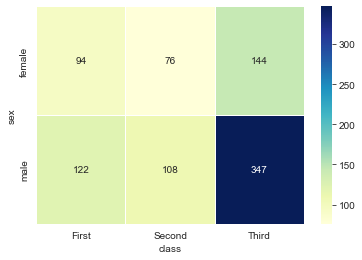

In [23]:
#기본은 진한색깔일수록 적은수.
sns.heatmap(
    table,
    annot=True, # 숫자가 보임.
    fmt = 'd', # 정수로 볼꺼야
    linewidths= 0.5, # 간격이 떨어짐
    cmap='YlGnBu', # cmap은 타입이 정해져있어서 찾아보고 하는게 좋다!
    cbar=True # 옆에 컬러바 보이게 하는게 디폴트값
)
plt.show()

## 범주형 데이터의 산점도
- 범주형 변수에 들어 있는 각 범주별 데이터의 분포를 확인  
- (이거 없으면 누적막대그래프로 확인해야해)
- stripplot : 단점 중복 데이터를 볼수가 없어서 옆에 하나 더만들어야함

In [15]:
sns.set_style("whitegrid")

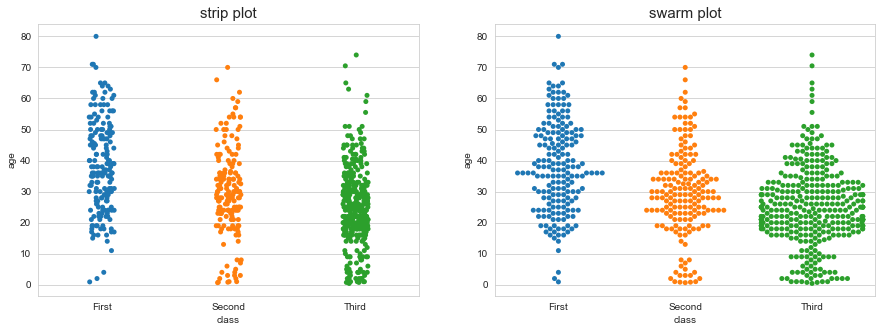

In [16]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


sns.stripplot(
    x = 'class',
    y = 'age',
    data = titanic,
    ax=ax1
)

# swarm : 벌레떼
sns.swarmplot(
    x = 'class',
    y = 'age',
    data = titanic,
    ax=ax2
)

#차트 제목
ax1.set_title('strip plot', size = 15)
ax2.set_title('swarm plot', size = 15)
plt.show()

---
## 막대그래프
- Seaborn의 막대그래프는 항상 오차라는 단어가 붇는다. -> 계산한값의 그래프가 그려진거라서 오차율이 생김.
- Seaborn의 막대그래프는count에 대한 막대 그래프가 아님! %그래프임!


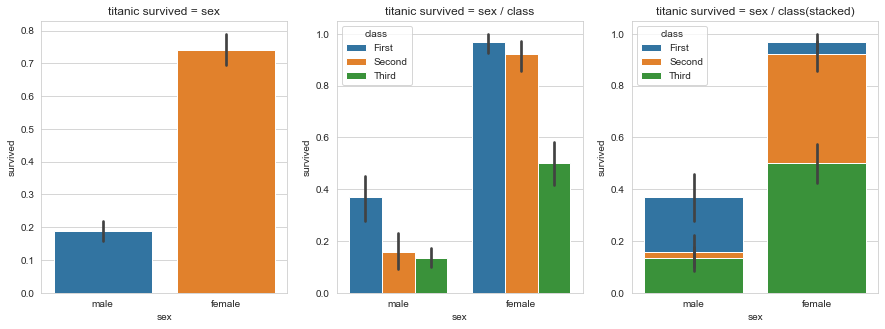

In [17]:
# 3분할로 그릴꺼야
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)


# x, y축의 변수 할당
sns.barplot(
    x = 'sex',
    y = 'survived',
    data=titanic,
    ax=ax1
    #,ci='sd' # 표준편차에 대해 쓰겠다.
)


# x, y, hue 3차원데이터를 2차원 데이터로 표현할수 있다
sns.barplot(
    x = 'sex',
    y = 'survived',
    hue='class', #class 별로 막대그래프로 그려주겠다.
    data=titanic,
    ax=ax2
    #,ci='sd' # 표준편차에 대해 쓰겠다.
)


# x, y, hue 누적 막대그래프 출력
sns.barplot(
    x = 'sex',
    y = 'survived',
    hue='class', #class 별로 막대그래프로 그려주겠다.
    dodge=False, # 누적하면 오차막대가 애매해져서 나눠서 사용해야함.
    data=titanic,
    ax=ax3
    #,ci='sd' # 표준편차에 대해 쓰겠다.
)

# title
ax1.set_title('titanic survived = sex')
ax2.set_title('titanic survived = sex / class')
ax3.set_title('titanic survived = sex / class(stacked)')
plt.show()

# 남자는 생존범위가 20퍼 밖에 안되는데 오차 범위가 거의 없고?? 이렇게 보는건가..

> 중앙의 검은 막대 : 오차막대(error bar)

---
## 빈도 그래프

- 기본적인 막대그래프 이건 카운트수!

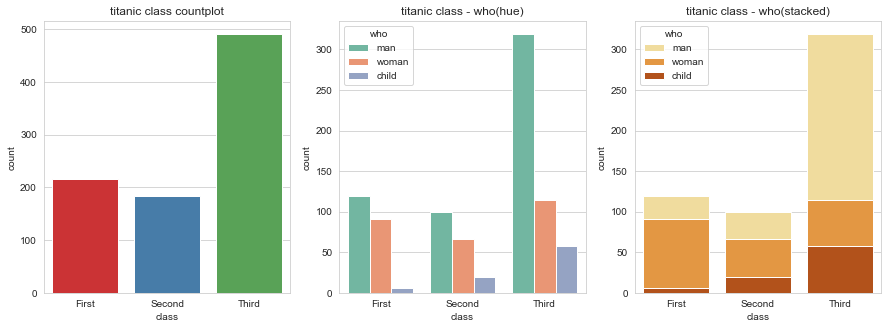

In [18]:
# 3분할로 그릴꺼야
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 기본값 카운트 막대그래프
sns.countplot(
    x = 'class',
    data= titanic,
    palette='Set1',
    ax=ax1
)

#who Column 분리해서 막대 그래프 그리기
# hue
sns.countplot(
    x = 'class',
    hue='who',
    data= titanic,
    palette='Set2',
    ax=ax2
)

# stacked
sns.countplot(
    x = 'class',
    hue='who',
    data= titanic,
    palette='YlOrBr',
    dodge= False,
    ax=ax3
)

ax1.set_title('titanic class countplot')
ax2.set_title('titanic class - who(hue)')
ax3.set_title('titanic class - who(stacked)')

plt.show()

---
## 박스플롯 / 바이올린 그래프
- 박스플롯은 범주형 데이터의 분포와 주요 통계지표를 함께 제공하지만 데이터가 퍼져있는 분산의 정도를 알기 어렵다.  
- 바이올린 그래프 : 박스플롯에 커널밀도 함수 그래프 추가(분산의 크기 : 분포된 크기)
- 자주 자용하심!

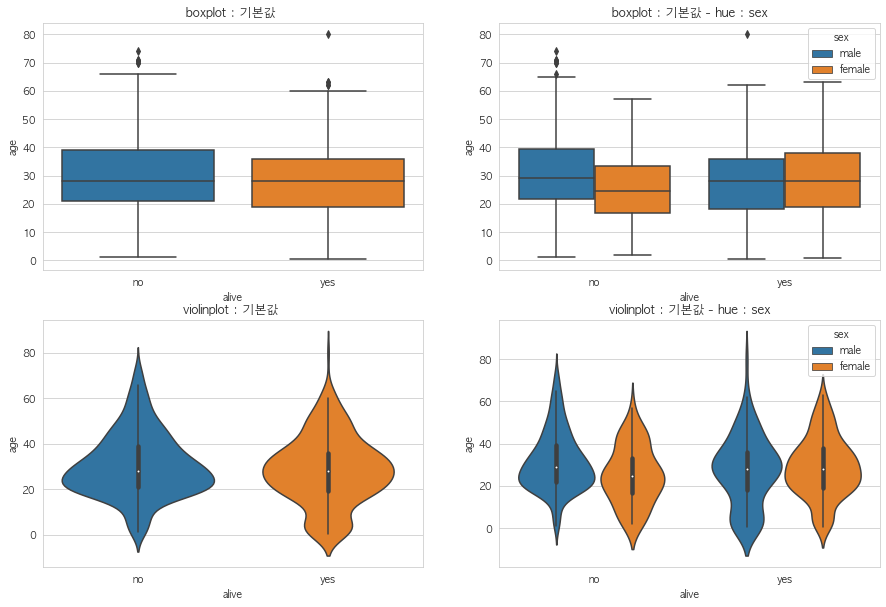

In [25]:
# 2행 2열 그릴꺼야
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# 연령대별 생존
#boxplot : 기본값
sns.boxplot(
    x = 'alive',
    y = 'age',
    data = titanic,
    ax=ax1
)

#boxplot : 기본값 - hue : sex
sns.boxplot(
    x = 'alive',
    y = 'age',
    hue = 'sex',
    data = titanic,
    ax=ax2
)

#violinplot : 기본값 : 크기를 알수 있다.
sns.violinplot(
    x = 'alive',
    y = 'age',
    data = titanic,
    ax=ax3
)

#boxplot : 기본값 - hue : sex
sns.violinplot(
    x = 'alive',
    y = 'age',
    hue = 'sex',
    data = titanic,
    ax=ax4
)

ax1.set_title("boxplot : 기본값 ")
ax2.set_title("boxplot : 기본값 - hue : sex")
ax3.set_title("violinplot : 기본값 ")
ax4.set_title("violinplot : 기본값 - hue : sex")
plt.show()

---
## 조인트 그래프
- 산점도를 기본으로 표시하고 각 축에 대한 히스토그램을 동시 제공

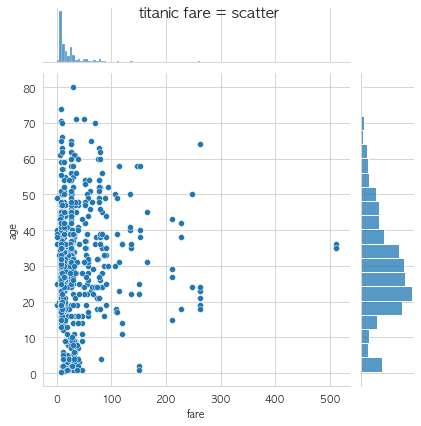

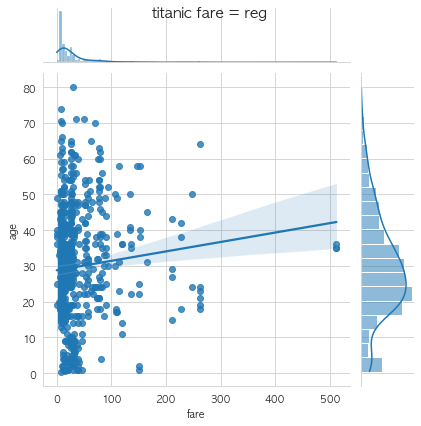

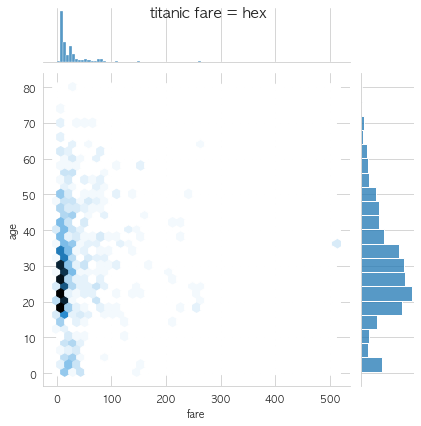

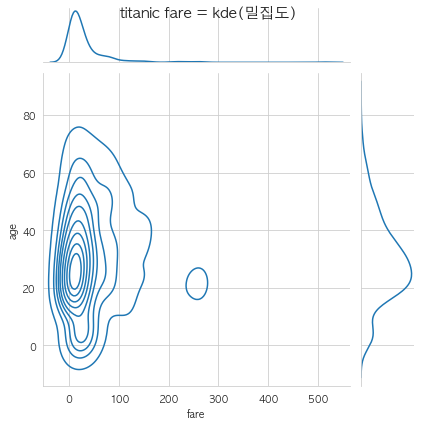

In [26]:
# fig = plt.figure(figsize=(15,10))
# j1 = fig.add_subplot(2, 2, 1)
# j2 = fig.add_subplot(2, 2, 2)
# j3 = fig.add_subplot(2, 2, 3)
# j4 = fig.add_subplot(2, 2, 4)


# 조인트 그래프 : 산점도 (기본값)
j1 = sns.jointplot(
    x = 'fare',
    y = 'age',
    data = titanic
)


# 조인트 그래프 : 회귀선
j2 = sns.jointplot(
    x = 'fare',
    y = 'age',
    kind='reg',
    data = titanic
)


# 조인트 그래프 : 육각그래프
j3 = sns.jointplot(
    x = 'fare',
    y = 'age',
    kind='hex',
    data = titanic
)


# 조인트 그래프 : 커널 밀집 그래프
j4 = sns.jointplot(
    x = 'fare',
    y = 'age',
    kind='kde',
    data = titanic
)


# 위에 쓰는 타이틀 suptitle
j1.fig.suptitle('titanic fare = scatter', size=15) 
j2.fig.suptitle('titanic fare = reg', size=15) 
j3.fig.suptitle('titanic fare = hex', size=15) 
j4.fig.suptitle('titanic fare = kde(밀집도)', size=15) 

plt.show()

---
## 조건을 적용하여 화면을 Grid로나누기

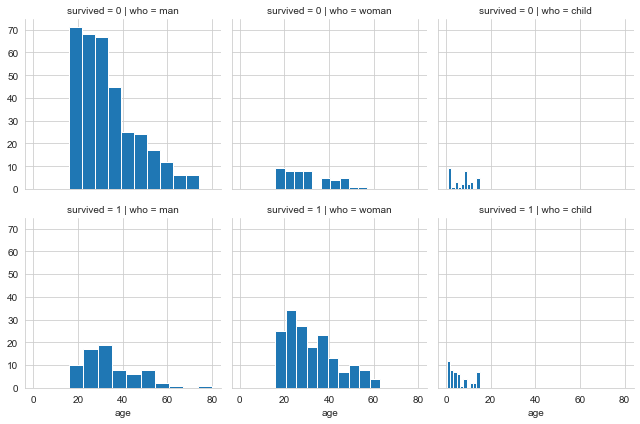

In [21]:
# 조건에 따라 Grid 나누기
g = sns.FacetGrid(
    data = titanic,
    col='who',
    row='survived'
)

# y축이 age
g = g.map(plt.hist, 'age')

---
## **이변수 데이터 분포
- 매트릭스 형태로 짝을 지어 표현
- 한번에 보여줄수 있어서 엄청 편함
- 아마 분설할떄 제일처음 그리지 않을까 함!

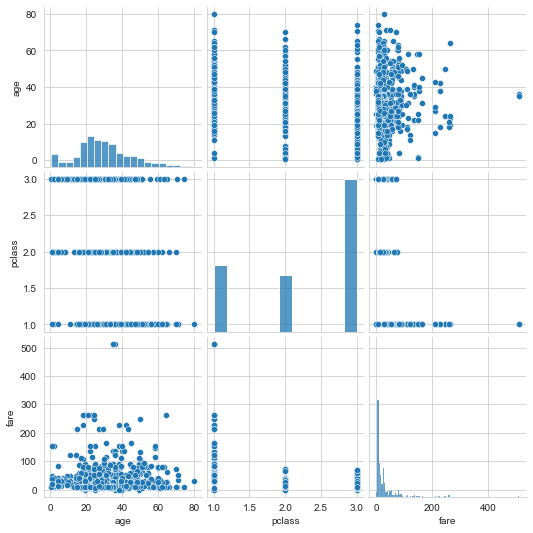

In [22]:
# titanic 데이터 셋 중에서 분석 데이터 선택하기
# 컬럼분석할떄 많이 씀
titanic_pair = titanic[['age','pclass','fare']] 

#조건에 따라 그리드 나누기
sns.pairplot(titanic_pair)

plt.show()